## Import the dependencies

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

## Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FER-2013/icml_face_data.csv')
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


## Data processing

In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")
     

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 200
width, height = 48, 48

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [ ]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [ ]:
# Convert the labels to one-hot encoding
y_train = np_utils.to_categorical(train_data['emotion'], 7)
y_val = np_utils.to_categorical(val_data['emotion'], 7)
y_test = np_utils.to_categorical(test_data['emotion'], 7)

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

## Model building

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                      

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

## Model training

In [ ]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=190,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/190
449/449 [==============================] - 16s 22ms/step - loss: 1.7375 - accuracy: 0.2887 - val_loss: 1.5856 - val_accuracy: 0.3759
Epoch 2/190
449/449 [==============================] - 9s 20ms/step - loss: 1.5307 - accuracy: 0.3958 - val_loss: 1.3910 - val_accuracy: 0.4614
Epoch 3/190
449/449 [==============================] - 10s 21ms/step - loss: 1.4179 - accuracy: 0.4526 - val_loss: 1.3427 - val_accuracy: 0.4870
Epoch 4/190
449/449 [==============================] - 11s 23ms/step - loss: 1.3585 - accuracy: 0.4742 - val_loss: 1.2797 - val_accuracy: 0.5077
Epoch 5/190
449/449 [==============================] - 10s 21ms/step - loss: 1.3070 - accuracy: 0.4924 - val_loss: 1.2529 - val_accuracy: 0.5127
Epoch 6/190
449/449 [==============================] - 10s 23ms/step - loss: 1.2757 - accuracy: 0.5088 - val_loss: 1.2576 - val_accuracy: 0.5152
Epoch 7/190
449/449 [==============================] - 11s 24ms/step - loss: 1.2426 - accuracy: 0.5253 - val_loss: 1.2069 - val_acc

## Save Model

In [ ]:
model.save('model.h5')

## Plot graphs

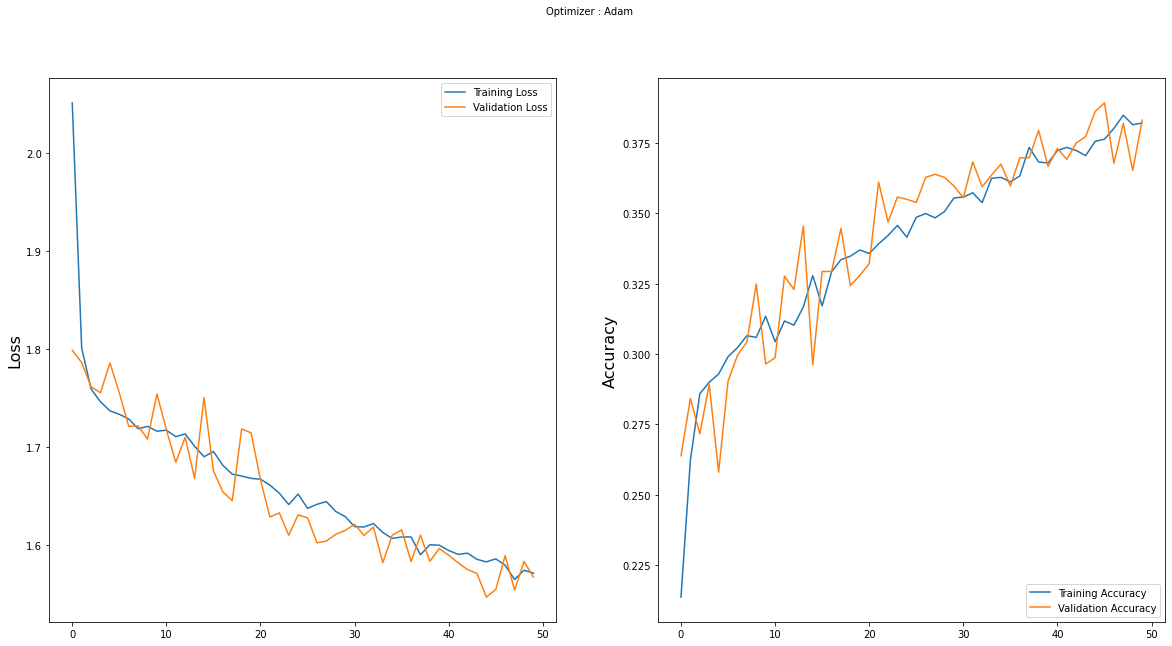

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Conclusion